In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/superstore-sales-eda/train.csv


In [3]:
sales_data = pd.read_csv('/kaggle/input/superstore-sales-eda/train.csv')
sales_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
sales_data.shape

(9800, 18)

In [6]:
sales_data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

There are 11 Missing values in the Postal Code column.

Replace/Fill Missing values in the Postal Code column with 0.

In [7]:
sales_data['Postal Code'] = sales_data['Postal Code'].fillna(0)

In [8]:
sales_data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

**Convert the data type from Float to Integer in the Postal Code column**

In [9]:
sales_data['Postal Code'] = sales_data['Postal Code'].astype(int)

In [10]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Successfully converted the data types of Postal Code and Sales to integer.

In [11]:
sales_data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


# **Data Cleaning**

# Checking is there any duplicated data

In [12]:
sales_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

In [13]:
sales_data.duplicated().sum()

0

There are no duplicates in this data.

# **Customer Segmentation**

In [14]:
customer_type = sales_data['Segment'].unique()
print(customer_type)

['Consumer' 'Corporate' 'Home Office']


In [15]:
customer_type = sales_data['Segment'].value_counts().reset_index()
customer_type.columns = ['Tipe Customer', 'Jumlah']
customer_type

,Tipe Customer,Jumlah
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


# Create a Pie Chart for customer type

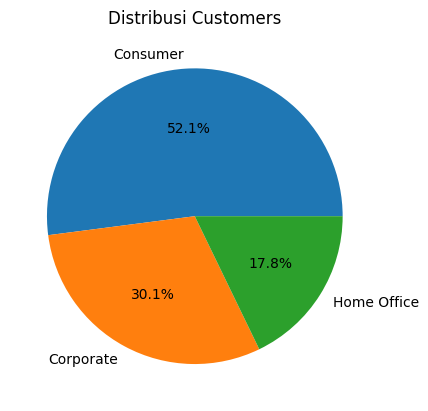

In [16]:
plt.pie(customer_type['Jumlah'], labels = customer_type['Tipe Customer'], autopct = '%1.1f%%')
plt.title('Distribusi Customers')
plt.show()

**customer and sales**

In [17]:
sales_per_category = sales_data.groupby('Segment')['Sales'].sum().reset_index()
sales_per_category.columns = ["Tipe Customer","Total Sales"]
sales_per_category

,Tipe Customer,Total Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


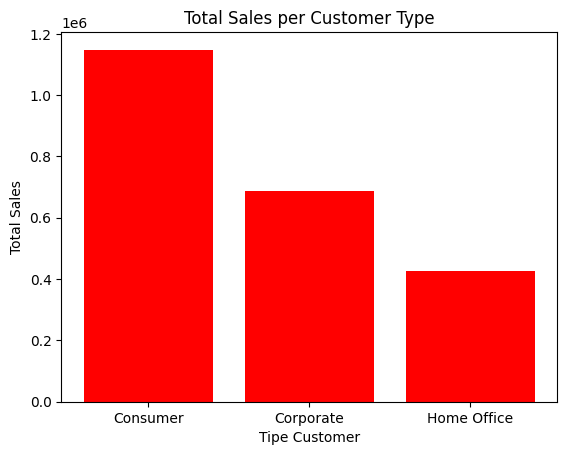

In [18]:
plt.bar(sales_per_category['Tipe Customer'], sales_per_category['Total Sales'], color="red")
plt.xlabel('Tipe Customer')
plt.ylabel('Total Sales')
plt.title('Total Sales per Customer Type')
plt.show()

# **# Customer Loyalty**

In [19]:
sales_data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [20]:
customer_order_freq = sales_data.groupby(['Customer ID', 'Customer Name','Segment'])['Order ID'].count().reset_index()

print(customer_order_freq)

    Customer ID       Customer Name    Segment  Order ID
0      AA-10315          Alex Avila   Consumer        11
1      AA-10375        Allen Armold   Consumer        15
2      AA-10480        Andrew Allen   Consumer        12
3      AA-10645       Anna Andreadi   Consumer        18
4      AB-10015       Aaron Bergman   Consumer         6
..          ...                 ...        ...       ...
788    XP-21865        Xylona Preis   Consumer        28
789    YC-21895      Yoseph Carroll  Corporate         8
790    YS-21880       Yana Sorensen  Corporate        12
791    ZC-21910    Zuschuss Carroll   Consumer        31
792    ZD-21925  Zuschuss Donatelli   Consumer         9

[793 rows x 4 columns]


In [21]:
# Identifying customers with repeat orders
customer_order_freq = customer_order_freq[customer_order_freq['Order ID'] >= 1]  # Filter only customers with at least one Order ID

# Sorting the DataFrame by the number of Order IDs in descending order
customer_order_freq = customer_order_freq.sort_values(by='Order ID', ascending=False)  # Sort customers by highest order count

# Renaming columns for clarity
customer_order_freq.columns = ['Customer ID', 'Customer Name', 'Customer Type', 'Order Count']  # Provide more descriptive column names

# Printing the top 10 entries of the filtered and sorted DataFrame
print(customer_order_freq.head(10).reset_index(drop=True))  # Display the top 10 customers with reset index


  Customer ID        Customer Name Customer Type  Order Count
0    WB-21850        William Brown      Consumer           35
1    PP-18955           Paul Prost   Home Office           34
2    MA-17560         Matt Abelman   Home Office           34
3    JL-15835             John Lee      Consumer           33
4    CK-12205  Chloris Kastensmidt      Consumer           32
5    SV-20365          Seth Vernon      Consumer           32
6    JD-15895     Jonathan Doherty     Corporate           32
7    AP-10915       Arthur Prichep      Consumer           31
8    ZC-21910     Zuschuss Carroll      Consumer           31
9    EP-13915           Emily Phan      Consumer           31


# **TOP 10 SPENDER**

In [22]:
top10_spender = sales_data.groupby(["Customer ID", "Customer Name"])['Sales'].sum().reset_index()
top10_spender = top10_spender.sort_values(by='Sales', ascending=False)
top10_spender.columns = ['Customer ID', 'Customer Name', 'Total Sales']


In [23]:
top10_spender = top10_spender.head(10).reset_index(drop=True)
top10_spender

,Customer ID,Customer Name,Total Sales
0,SM-20320,Sean Miller,25043.050
1,TC-20980,Tamara Chand,19052.218
2,RB-19360,Raymond Buch,15117.339
3,TA-21385,Tom Ashbrook,14595.620
4,AB-10105,Adrian Barton,14473.571
5,KL-16645,Ken Lonsdale,14175.229
6,SC-20095,Sanjit Chand,14142.334
7,HL-15040,Hunter Lopez,12873.298
8,SE-20110,Sanjit Engle,12209.438
9,CC-12370,Christopher Conant,12129.072


# **Top Sales by Product Category**

In [24]:
product_category = sales_data['Category'].value_counts().reset_index()
product_category.columns = ['Product Category', 'Count']
product_category


,Product Category,Count
0,Office Supplies,5909
1,Furniture,2078
2,Technology,1813


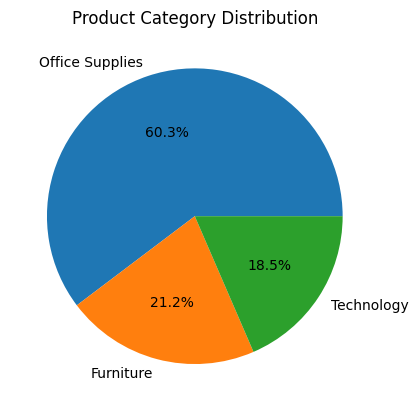

In [25]:
plt.pie(product_category['Count'], labels=product_category['Product Category'], autopct='%1.1f%%')
plt.title('Product Category Distribution')
plt.show()

In [26]:
category_by_sales = sales_data.groupby(['Category'])['Sales'].sum().reset_index()
category_by_sales = category_by_sales.sort_values(by='Sales', ascending=False)
category_by_sales

,Category,Sales
2,Technology,827455.8730
0,Furniture,728658.5757
1,Office Supplies,705422.3340


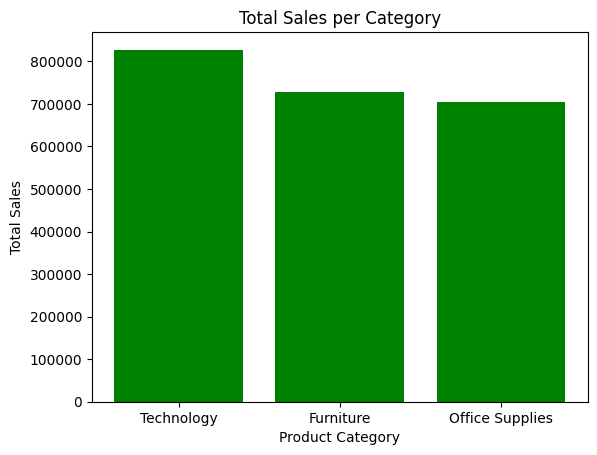

In [27]:
plt.bar(category_by_sales['Category'], category_by_sales['Sales'], color="green")
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales per Category')
plt.show()

# **Sales by Sub-Category**

In [28]:
subcategory = sales_data.groupby("Category")["Sub-Category"].nunique().reset_index()
subcategory = subcategory.sort_values(by="Sub-Category", ascending=False)
subcategory


,Category,Sub-Category
1,Office Supplies,9
0,Furniture,4
2,Technology,4


In [29]:
sales_subcategory = sales_data['Sub-Category'].value_counts().reset_index()
sales_subcategory.columns = ['Sub-Category', 'Count']
sales_subcategory

,Sub-Category,Count
0,Binders,1492
1,Paper,1338
2,Furnishings,931
3,Phones,876
4,Storage,832
5,Art,785
6,Accessories,756
7,Chairs,607
8,Appliances,459
9,Labels,357


In [30]:
sales_by_subcategories = sales_data.groupby(['Sub-Category'])['Sales'].sum().reset_index()
sales_by_subcategories = sales_by_subcategories.sort_values(by='Sales', ascending=True)
sales_by_subcategories

,Sub-Category,Sales
8,Fasteners,3001.9600
10,Labels,12347.7260
7,Envelopes,16128.0460
2,Art,26705.4100
15,Supplies,46420.3080
12,Paper,76828.3040
9,Furnishings,89212.0180
1,Appliances,104618.4030
4,Bookcases,113813.1987
6,Copiers,146248.0940


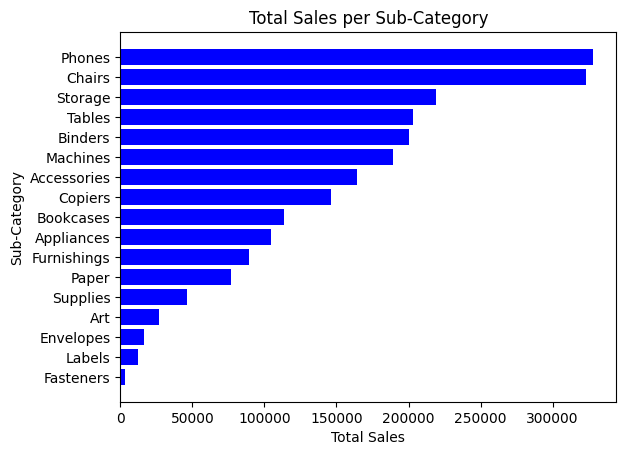

In [31]:
plt.barh(sales_by_subcategories['Sub-Category'], sales_by_subcategories['Sales'], color="blue")
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.title('Total Sales per Sub-Category')
plt.show()

# **Mode Of Shipping**

In [32]:
sales_data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [33]:
shipping = sales_data["Ship Mode"].value_counts().reset_index()
shipping.columns = ['Shipping Type', 'Frequency']
shipping


,Shipping Type,Frequency
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


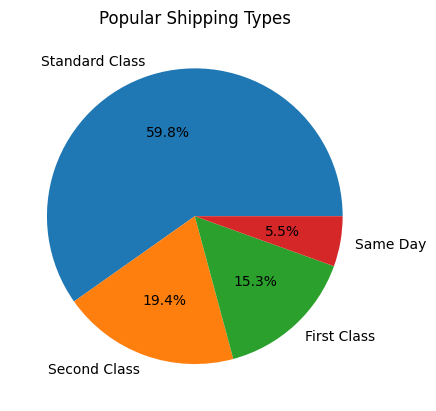

In [34]:
plt.pie(shipping['Frequency'], labels=shipping['Shipping Type'], autopct='%1.1f%%')
plt.title('Popular Shipping Types')
plt.show()

## **Geographical Analysis**

In [35]:
customer_by_state = sales_data.groupby(['State'])['Customer ID'].count().reset_index()
customer_by_state = customer_by_state.sort_values(by='Customer ID', ascending=False)
customer_by_state.columns = ['State', 'Customer Count']


In [36]:
customer_by_state = customer_by_state.head(5)
customer_by_state

,State,Customer Count
3,California,1946
30,New York,1097
41,Texas,973
36,Pennsylvania,582
45,Washington,504


# **Biggest Sales by City**

In [37]:
city_by_sales = sales_data.groupby(['City'])['Sales'].sum().reset_index()
city_by_sales = city_by_sales.sort_values(by='Sales', ascending=False)
city_by_sales.columns = ['City', 'Total Sales']
print(city_by_sales)


              City  Total Sales
327  New York City   252462.547
265    Los Angeles   173420.181
450        Seattle   116106.322
436  San Francisco   109041.120
372   Philadelphia   108841.749
..             ...          ...
352   Ormond Beach        2.808
368      Pensacola        2.214
221        Jupiter        2.064
140         Elyria        1.824
1          Abilene        1.392

[529 rows x 2 columns]


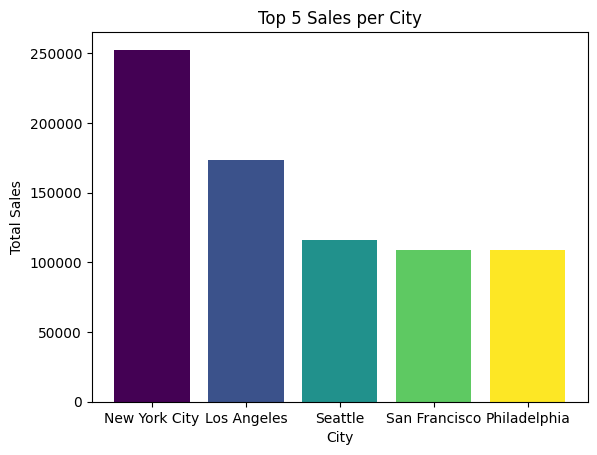

In [38]:
colors = plt.cm.viridis(np.linspace(0, 1, 5))
city_by_sales = city_by_sales.sort_values(by='Total Sales', ascending=False).head(5)

plt.bar(city_by_sales['City'], city_by_sales['Total Sales'], color=colors)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Top 5 Sales per City')
plt.show()

# **Year-over-year sales**

In [39]:
sales_data["Order Date"] = pd.to_datetime(sales_data["Order Date"], dayfirst=True)
yearly_sales = sales_data.groupby(sales_data["Order Date"].dt.year)["Sales"].sum().reset_index()
yearly_sales.columns = ["Year", "Total Sales"]
yearly_sales


,Year,Total Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


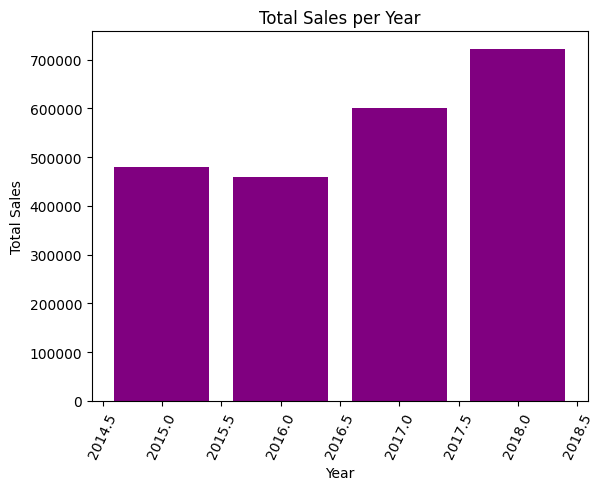

In [40]:
plt.bar(yearly_sales["Year"], yearly_sales["Total Sales"], color="purple")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Total Sales per Year")
plt.xticks(rotation=65)
plt.show()

# **Quarter Sales 2015**

In [41]:
# Convert 'Order Date' column to datetime
sales_data['Order Date'] = pd.to_datetime(sales_data["Order Date"], dayfirst=True)

# Filter data for the year 2015
year_sales = sales_data[sales_data["Order Date"].dt.year == 2015]

# Set 'Order Date' as the index
year_sales.set_index('Order Date', inplace=True)

# Calculate total sales per quarter
quarterly_sales = year_sales['Sales'].resample('QE').sum()

# Reset index and rename columns
quarterly_sales = quarterly_sales.reset_index()
quarterly_sales.columns = ["Quarter", "Total Sales"]

# Display the results
quarterly_sales


,Quarter,Total Sales
0,2015-03-31,73931.3960
1,2015-06-30,85874.0936
2,2015-09-30,142522.6063
3,2015-12-31,177528.1122


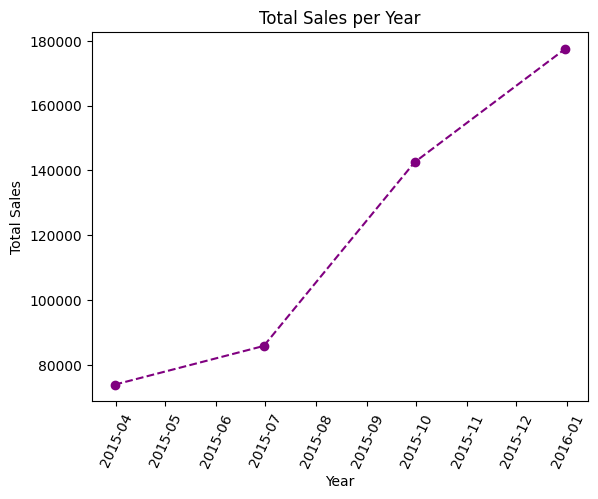

In [42]:
plt.plot(quarterly_sales["Quarter"], quarterly_sales["Total Sales"], marker='o', linestyle="--", color="purple")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Total Sales per Year")
plt.xticks(rotation=65)
plt.show()


# **Monthly Sales trend for a year (2015)**

In [43]:
# Convert the 'Order Date' column to datetime
sales_data['Order Date'] = pd.to_datetime(sales_data["Order Date"], dayfirst=True)

# Filter data for the year 2015
year_sales = sales_data[sales_data["Order Date"].dt.year == 2015]

# Calculate total sales per month
monthly_sales = year_sales.resample('ME', on='Order Date')['Sales'].sum()

# Reset the index and rename the columns
monthly_sales = monthly_sales.reset_index()
monthly_sales.columns = ["Month", "Total Sales"]
monthly_sales


,Month,Total Sales
0,2015-01-31,14205.7070
1,2015-02-28,4519.8920
2,2015-03-31,55205.7970
3,2015-04-30,27906.8550
4,2015-05-31,23644.3030
5,2015-06-30,34322.9356
6,2015-07-31,33781.5430
7,2015-08-31,27117.5365
8,2015-09-30,81623.5268
9,2015-10-31,31453.3930


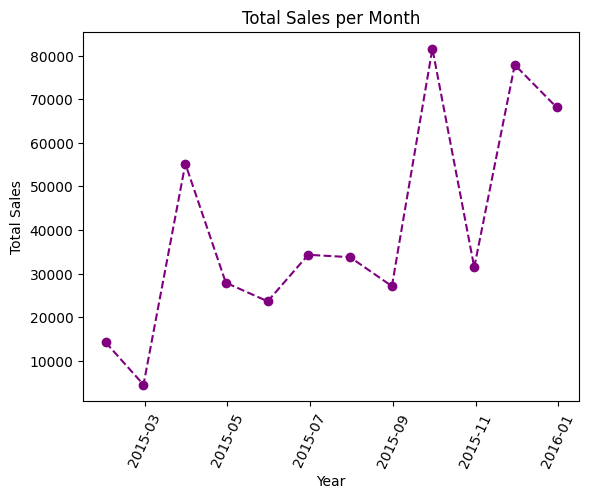

In [44]:
plt.plot(monthly_sales["Month"], monthly_sales["Total Sales"], marker='o', linestyle="--", color="purple")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Total Sales per Month")
plt.xticks(rotation=65)
plt.show()
